# 1. Import Libraries

In [6]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

# 2. Explore & Pre-process Data

### Load & view dataset

In [21]:
raw_data = pd.read_csv('car_spec_data.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### View descriptive statistics of the dataset

In [22]:
data = raw_data
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Deal with missing values

In [23]:
#view missing values
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [24]:
#fill missing values with Median
data_no_mv = data.dropna(axis=0)
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Plot PDF for numerical features & remove outliers

C:\Users\dungn\anaconda3\envs\py3-tf2-base\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

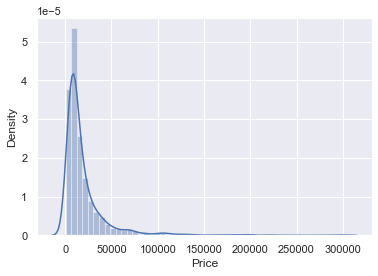

In [25]:
#plot Probability Dist Function of Price
sns.distplot(data_no_mv['Price'])

In [26]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]

C:\Users\dungn\anaconda3\envs\py3-tf2-base\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

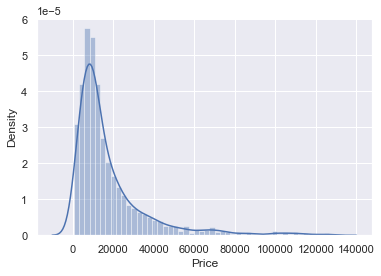

In [27]:
sns.distplot(data_1['Price'])

C:\Users\dungn\anaconda3\envs\py3-tf2-base\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

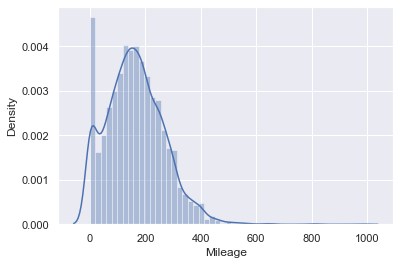

In [28]:
#plot Probability Dist Function of Mileage
sns.distplot(data_no_mv['Mileage'])

In [29]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

C:\Users\dungn\anaconda3\envs\py3-tf2-base\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

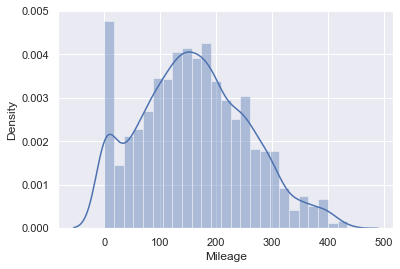

In [30]:
sns.distplot(data_2['Mileage'])

C:\Users\dungn\anaconda3\envs\py3-tf2-base\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

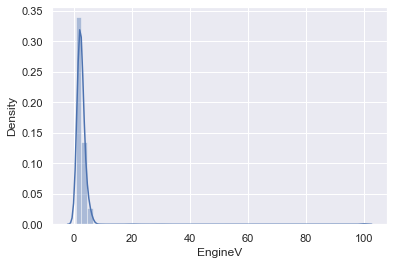

In [31]:
#plot Probability Dist Function of EngineV
sns.distplot(data_no_mv['EngineV'])

In [32]:
#Drop abnormal values of EngineV (99.99990, anything >= 6.5 )
data_3 = data_2[data_2['EngineV']<6.5]

C:\Users\dungn\anaconda3\envs\py3-tf2-base\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

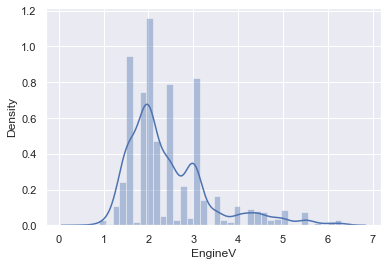

In [33]:
sns.distplot(data_3['EngineV'])

C:\Users\dungn\anaconda3\envs\py3-tf2-base\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

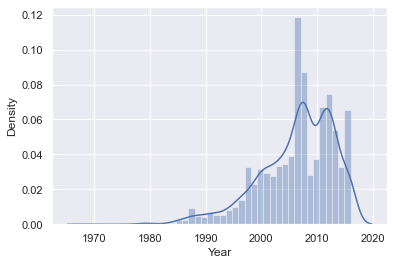

In [34]:
#Plot PDF of Year
sns.distplot(data_no_mv['Year'])

In [35]:
#remove outliers in Year
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

C:\Users\dungn\anaconda3\envs\py3-tf2-base\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

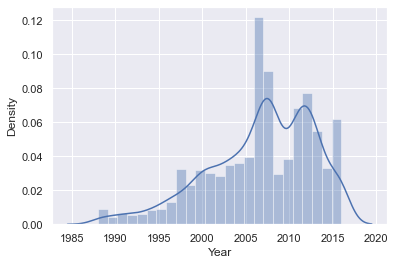

In [36]:
sns.distplot(data_4['Year'])

In [37]:
#reset the index of the dataframe
data_cleaned = data_4.reset_index(drop=True)

In [38]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867
unique,7,NaN,6,NaN,NaN,4,2,NaN,291
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,181
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853,NaN
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,NaN


# 3. Checking the OLS assumptions

### 1. Check the Linearity assumption.

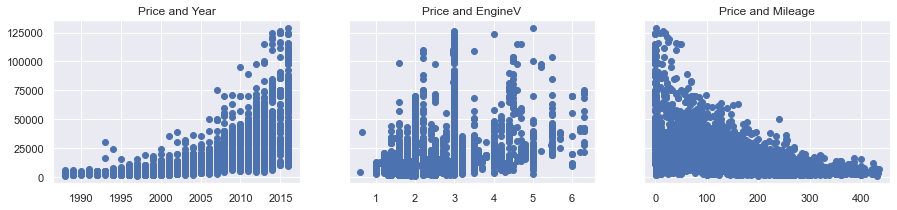

In [39]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

C:\Users\dungn\anaconda3\envs\py3-tf2-base\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

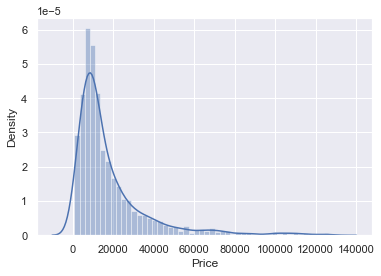

In [40]:
sns.distplot(data_cleaned['Price'])

In [41]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656


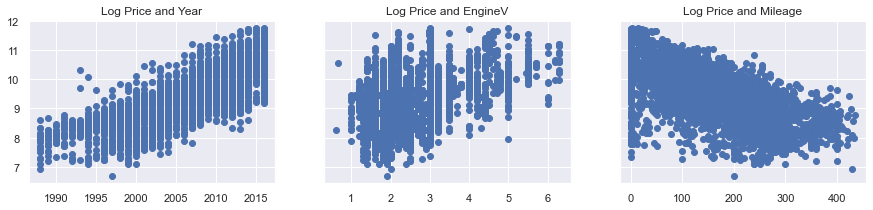

In [42]:
# plot the log_price against the 3 features: Year, EngineV and Mileage  
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()
#the relationship looks more linear now.

In [43]:
#drop the "Price" column
data_cleaned = data_cleaned.drop(['Price'],axis=1)
data_cleaned.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656


### 5. Check for Multicollinearity

In [45]:
#See the chosen features
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model', 'log_price'], dtype=object)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
variables.shape[1]

3

In [47]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [48]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [49]:
#We drop Year feature as its VIF is >10
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)
data_no_multicollinearity.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Model,log_price
0,BMW,sedan,277,2.0,Petrol,yes,320,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,Sprinter 212,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,S 500,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,Q7,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,Rav 4,9.814656


# 4. Create dummy variables

In [50]:
# create dummy variables for categorical features
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [51]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.0,8.342840,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,427,2.9,8.974618,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,358,5.0,9.495519,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,240,4.2,10.043249,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120,2.0,9.814656,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Rearrange

In [52]:
#Rearrange. Put the dependent variable "log_proce" first
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
       'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 'Model_73

In [53]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
       'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 'Model_730', 'Model_735', 'Model_740', 'Model_745',
       'Model_750', 'Model_760', 'Model_80', 'Model_9', 'Model_90',
       'Model_A 140', 'Model_A 150', 'Model_A 170', 'Model_A 180',
       'Model_A1', 'Model_A3', 'Model_A4', 'Model_A4 Allroad', 'Model_A5',
       'Model_A6', 'Model_A6 Allroad', 'Model_A7', 'Model_A8',
       'Model_ASX', 'Model_Amarok', 'Model_Auris', 'Model_Avalon',
       'Model_Avensis', 'Model_Aygo', 'Model_B 170', 'Model_B 180',
       'Model_B 200', 'Model_Beetle', 'Model_Bora', 'Model_C-Class',
       'Model_CL 180', 'Model_CL 500', 'Model_CL 55 AMG', 'Model_CL 550',
       'Model_CL 63 AMG', 'Model_CLA 200', 'Model_CLA 220',
       'Model_CLA-Class', 'Model_CLC 180', 'Model_CLC 200',
       'Model_CLK 200', 'Model_CLK 220', 'Model_CLK 230', 'Model_CLK 240',
       'Model_CLK 280', 'Model_CLK 320', 'Model_CLK 430', 'Model_CLS 350',
       'Model_CLS 400', 'Model_CLS 500', 'Model_CLS 63 AMG',
       'Model_Caddy', 'Model_Camry', 'Model_Captur', 'Model_Caravelle',
       'Model_Carina', 'Model_Carisma', 'Model_Celica', 'Model_Clio',
       'Model_Colt', 'Model_Corolla', 'Model_Corolla Verso',
       'Model_Cross Touran', 'Model_Dokker', 'Model_Duster',
       'Model_E-Class', 'Model_Eclipse', 'Model_Eos', 'Model_Espace',
       'Model_FJ Cruiser', 'Model_Fluence', 'Model_Fortuner',
       'Model_G 320', 'Model_G 350', 'Model_G 500', 'Model_G 55 AMG',
       'Model_G 63 AMG', 'Model_GL 320', 'Model_GL 350', 'Model_GL 420',
       'Model_GL 450', 'Model_GL 500', 'Model_GL 550', 'Model_GLC-Class',
       'Model_GLE-Class', 'Model_GLK 220', 'Model_GLK 300',
       'Model_GLS 350', 'Model_GLS 400', 'Model_Galant', 'Model_Golf GTI',
       'Model_Golf II', 'Model_Golf III', 'Model_Golf IV',
       'Model_Golf Plus', 'Model_Golf V', 'Model_Golf VI',
       'Model_Golf VII', 'Model_Golf Variant', 'Model_Grand Scenic',
       'Model_Grandis', 'Model_Hiace', 'Model_Highlander', 'Model_Hilux',
       'Model_I3', 'Model_IQ', 'Model_Jetta', 'Model_Kangoo',
       'Model_Koleos', 'Model_L 200', 'Model_LT', 'Model_Laguna',
       'Model_Lancer', 'Model_Lancer Evolution', 'Model_Lancer X',
       'Model_Lancer X Sportback', 'Model_Land Cruiser 100',
       'Model_Land Cruiser 105', 'Model_Land Cruiser 200',
       'Model_Land Cruiser 76', 'Model_Land Cruiser 80',
       'Model_Land Cruiser Prado', 'Model_Latitude', 'Model_Logan',
       'Model_Lupo', 'Model_M5', 'Model_M6', 'Model_MB', 'Model_ML 250',
       'Model_ML 270', 'Model_ML 280', 'Model_ML 320', 'Model_ML 350',
       'Model_ML 400', 'Model_ML 430', 'Model_ML 500', 'Model_ML 550',
       'Model_ML 63 AMG', 'Model_Master', 'Model_Matrix', 'Model_Megane',
       'Model_Modus', 'Model_Multivan', 'Model_New Beetle',
       'Model_Outlander', 'Model_Outlander XL', 'Model_Pajero',
       'Model_Pajero Pinin', 'Model_Pajero Sport', 'Model_Pajero Wagon',
       'Model_Passat B3', 'Model_Passat B4', 'Model_Passat B5',
       'Model_Passat B6', 'Model_Passat B7', 'Model_Passat B8',
       'Model_Passat CC', 'Model_Phaeton', 'Model_Pointer', 'Model_Polo',
       'Model_Previa', 'Model_Prius', 'Model_Q3', 'Model_Q5', 'Model_Q7',
       'Model_R 320', 'Model_R8', 'Model_Rav 4', 'Model_S 140',
       'Model_S 250', 'Model_S 300', 'Model_S 320', 'Model_S 350',
       'Model_S 400', 'Model_S 430', 'Model_S 500', 'Model_S 550',
       'Model_S 600', 'Model_S 63 AMG', 'Model_S 65 AMG', 'Model_S4',
       'Model_S5', 'Model_S8', 'Model_SL 500 (550)', 'Model_SL 55 AMG',
       'Model_SLK 200', 'Model_SLK 350', 'Model_Sandero',
       'Model_Sandero StepWay', 'Model_Scenic', 'Model_Scion',
       'Model_Scirocco', 'Model_Sequoia', 'Model_Sharan', 'Model_Sienna',
       'Model_Smart', 'Model_Space Star', 'Model_Space Wagon',
       'Model_Sprinter 208', 'Model_Sprinter 210', 'Model_Sprinter 211',
       'Model_Sprinter 212', 'Model_Sprinter 213', 'Model_Sprinter 311',
       'Model_Sprinter 312', 'Model_Sprinter 313', 'Model_Sprinter 315',
       'Model_Sprinter 316', 'Model_Sprinter 318', 'Model_Sprinter 319',
       'Model_Symbol', 'Model_Syncro', 'Model_T3 (Transporter)',
       'Model_T4 (Transporter)', 'Model_T4 (Transporter) ',
       'Model_T5 (Transporter)', 'Model_T5 (Transporter) ',
       'Model_T6 (Transporter)', 'Model_T6 (Transporter) ', 'Model_TT',
       'Model_Tacoma', 'Model_Tiguan', 'Model_Touareg', 'Model_Touran',
       'Model_Trafic', 'Model_Tundra', 'Model_Up', 'Model_V 250',
       'Model_Vaneo', 'Model_Vento', 'Model_Venza', 'Model_Viano',
       'Model_Virage', 'Model_Vista', 'Model_Vito', 'Model_X1',
       'Model_X3', 'Model_X5', 'Model_X5 M', 'Model_X6', 'Model_X6 M',
       'Model_Yaris', 'Model_Z3', 'Model_Z4']

In [54]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,8.342840,277,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.974618,427,2.9,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.495519,358,5.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.043249,240,4.2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.814656,120,2.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Check for Multicollinearity with dummy variables

In [60]:
variables = data_preprocessed.drop(['log_price'],axis=1)
vif_with_dummy = pd.DataFrame()
vif_with_dummy["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif_with_dummy["features"] = variables.columns

C:\Users\dungn\anaconda3\envs\py3-tf2-base\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [62]:
vif_with_dummy.head(20)

,VIF,features
0,1.877858,Mileage
1,7.329829,EngineV
2,649.734832,Brand_BMW
3,1188.167331,Brand_Mercedes-Benz
4,inf,Brand_Mitsubishi
5,inf,Brand_Renault
6,inf,Brand_Toyota
7,inf,Brand_Volkswagen
8,7.097777,Body_hatch
9,5.956657,Body_other


In [58]:
features_huge_vif = vif_with_dummy.loc[vif_with_dummy['VIF'] > 10]
features_huge_vif.head(15)

,VIF,features
2,649.734832,Brand_BMW
3,1188.167331,Brand_Mercedes-Benz
4,inf,Brand_Mitsubishi
5,inf,Brand_Renault
6,inf,Brand_Toyota
7,inf,Brand_Volkswagen
10,19.078625,Body_sedan
12,12.135473,Body_van
18,inf,Model_11
22,inf,Model_19


In [63]:
#there are 165 features with vif value > 10
len(features_huge_vif)

165

# 5. Train Linear Regression model

### Declare the inputs and the targets

In [37]:
targets = data_preprocessed['log_price']
inputs_without_dummies = data_preprocessed[["Mileage", "EngineV"]]
inputs_without_dummies.head()

,Mileage,EngineV
0,277,2.0
1,427,2.9
2,358,5.0
3,240,4.2
4,120,2.0


### Scale the input data

In [38]:
#we use StandardScaler for sklearn
from sklearn.preprocessing import StandardScaler
#create a StandardScaler object 
scaler = StandardScaler()
#create the scaler mechanism for the object scaler 
scaler.fit(inputs_without_dummies)

StandardScaler()

In [39]:
# scale the Mileage & EngineV (numerical variable)
inputs_scaled = scaler.transform(inputs_without_dummies)

In [40]:
#put the scaled values of Mileage and EngineV back into the data_preprocessed dataframe
data_preprocessed[["Mileage", "EngineV"]] = inputs_scaled
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,8.342840,1.217908,-0.474525,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.974618,2.786602,0.473599,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.495519,2.065003,2.685886,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.043249,0.830963,1.843110,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.814656,-0.423992,-0.474525,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#Drop the "log_price"
inputs_scaled = data_preprocessed.drop(['log_price'],axis=1)
inputs_scaled.head()

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,1.217908,-0.474525,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.786602,0.473599,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.065003,2.685886,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.830963,1.843110,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.423992,-0.474525,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
#change the dataframe to numpy array for later training with sklearn
inputs_scaled_array = inputs_scaled.to_numpy()

### Train Test Split

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled_array, targets, test_size=0.2, random_state=365)

### Train the Regression Model

In [44]:
#create LinearRegression object
reg = LinearRegression()
#train the LinearRegression Model
reg.fit(x_train,y_train)

LinearRegression()

In [45]:
#store the prediction result
y_hat = reg.predict(x_train)
y_hat

array([9.36778259, 8.91786194, 9.63542175, ..., 9.90766907, 7.93280029,
       9.86929321])

# 6. Checking the model's performance

### Plot the predictions & targets

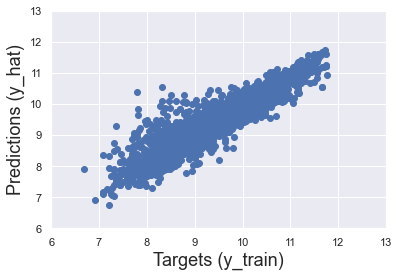

In [46]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()
#the closer the scatterplot is to the 45 degree line, the better the model

### Plot the PDF of the difference between targets & predictions 

C:\Users\dungn\anaconda3\envs\py3-tf2-base\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Difference PDF')

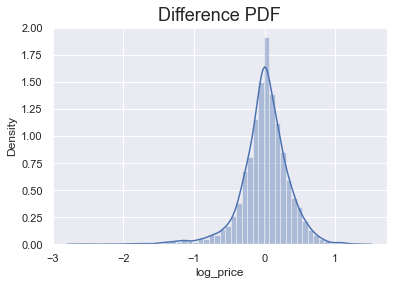

In [47]:
sns.distplot(y_train - y_hat)
plt.title("Difference PDF", size=18)

In [48]:
# From the plot we see that the assumption 3: Normality & Zero-mean of the Error term
# is maintained: The Error mean is 0, and the graph looks almost normally distributed.
# However, the distribution has a longer left tail, meaning the model 
# over-estimate some of the observations (y_train - y_hat is negative)

### Calculate the R-squared & adjusted R-squared

In [49]:
reg.score(x_train,y_train)
#meaning the model explained 84% of the variability of the model

0.841822162411354

In [50]:
x_train.shape

(3093, 307)

In [51]:
r_squared = reg.score(x_train,y_train)
n = x_train.shape[0]
p = x_train.shape[1]

adjusted_r_squared = 1-(1-r_squared)*(n-1)/(n-p-1)
adjusted_r_squared 

0.8243856826484404

# 7. Finding the weights and bias

In [52]:
# abormally high intercept value.
reg.intercept_

69738669023.22052

In [53]:
#coefficients for each Features
reg.coef_

array([-3.61051619e-01,  2.72009984e-02, -6.97386690e+10, -6.97386690e+10,
        1.28069236e+11, -8.37176665e+10, -7.66941064e+10, -2.71558589e+10,
       -2.29305811e-01, -3.89251709e-02, -1.30561829e-01, -1.78318024e-01,
       -5.63964844e-02, -2.85675049e-01, -1.67783737e-01, -2.52128601e-01,
        1.07450104e+00, -6.97386690e+10,  5.32801232e+10,  1.33469874e+00,
        1.25129443e+00, -7.70410061e-01,  1.39789975e+10,  5.01740217e-01,
        5.04666328e-01,  5.21219969e-01,  1.18676066e+00,  4.73760843e-01,
        1.39789975e+10,  5.69525719e-01, -2.40636110e-01,  5.26035309e-01,
        6.93564892e-01,  9.68791246e-01,  1.97398450e+09,  6.20666027e-01,
        8.23781431e-01,  1.06024718e+00,  6.61326964e+09,  1.68823028e+00,
        1.61531401e+00, -6.43133964e+08,  1.02164924e+00,  1.60187054e+00,
        1.22508240e+00,  1.13274002e+00, -1.28119560e+09,  6.66576385e-01,
        1.02876186e+00,  9.98229980e-01,  1.45071328e+00,  7.45058060e-01,
       -1.34605447e+09,  

In [54]:
# Create a summary table for each Features & their weights
reg_summary = pd.DataFrame(inputs_scaled.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary.head(10)

,Features,Weights
0,Mileage,-3.610516e-01
1,EngineV,2.720100e-02
2,Brand_BMW,-6.973867e+10
3,Brand_Mercedes-Benz,-6.973867e+10
4,Brand_Mitsubishi,1.280692e+11
5,Brand_Renault,-8.371767e+10
6,Brand_Toyota,-7.669411e+10
7,Brand_Volkswagen,-2.715586e+10
8,Body_hatch,-2.293058e-01
9,Body_other,-3.892517e-02


In [55]:
# view unique category of brand
data_cleaned['Brand'].unique()
# Interpretation of Weights in Dummy variable: a possitive Weight means that the 
# related category (Mitsubishi) is more expensive than the benchmark (Audi)

# 1st: The intercept value is abnormally large
# 2nd: each of the weights associated with brand categories is either too big or too small. All values are almost
# 10 to the power of 10.  

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

# 8. Train the 2nd Linear Regression model

In [56]:
# drop Brand features (Brand & Model together creates multicollinearity)
inputs_scaled_2 = data_preprocessed.drop(['log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen' ],axis=1)
inputs_scaled_2.head()

,Mileage,EngineV,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,1.217908,-0.474525,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2.786602,0.473599,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.065003,2.685886,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.830963,1.843110,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-0.423992,-0.474525,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [57]:
#change the dataframe to numpy array for later training with sklearn
inputs_scaled_array_2 = inputs_scaled_2.to_numpy()

### Train Test split

In [58]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled_array_2, targets, test_size=0.2, random_state=365)

In [59]:
#create LinearRegression object
reg_2 = LinearRegression()
#train the LinearRegression Model
reg_2.fit(x_train,y_train)

LinearRegression()

In [60]:
#store the prediction result
y_hat = reg_2.predict(x_train)
y_hat

array([9.36719673, 8.91770298, 9.63556156, ..., 9.90805348, 7.93286353,
       9.86982703])

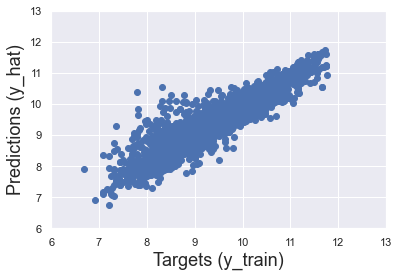

In [61]:
#checking model's performance
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()
#the closer the scatterplot is to the 45 degree line, the better the model

C:\Users\dungn\anaconda3\envs\py3-tf2-base\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Difference PDF')

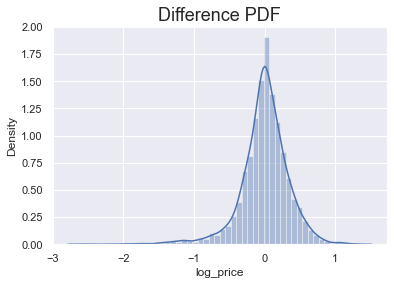

In [62]:
# plot the PDF of the difference between targets & predictions
sns.distplot(y_train - y_hat)
plt.title("Difference PDF", size=18)

In [63]:
#calculate R-squared
reg_2.score(x_train,y_train)
#the model explained 84% of the variability of the model

0.8418131634153043

In [64]:
x_train.shape

(3093, 301)

In [65]:
# adjusted R-squared
r_squared = reg_2.score(x_train,y_train)
n = x_train.shape[0]
p = x_train.shape[1]

adjusted_r_squared = 1-(1-r_squared)*(n-1)/(n-p-1)
adjusted_r_squared 

0.8247532430240491

In [66]:
# the intercept value is much smaller now
reg_2.intercept_

7.748503373168942

In [67]:
#coefficients for each Features
reg_2.coef_

array([-3.61111608e-01,  2.77423696e-02, -2.29130735e-01, -3.90569203e-02,
       -1.30437814e-01, -1.78335285e-01, -5.62216623e-02, -2.85969832e-01,
       -1.67963095e-01, -2.52475231e-01,  1.07482981e+00,  3.35849528e-01,
        7.75720980e+10,  1.33511646e+00,  1.25113858e+00, -7.70031268e-01,
       -2.22128310e-01,  6.51719790e-01,  6.53716778e-01,  6.70783640e-01,
        1.33593356e+00,  6.22400635e-01, -4.68827724e-01,  7.17904905e-01,
       -9.23695776e-02,  5.25947609e-01,  6.93464517e-01,  9.72290084e-01,
        1.07612279e+12,  6.20262930e-01,  8.23012764e-01,  1.06002108e+00,
       -3.60433221e+11,  1.68860853e+00,  1.61557267e+00, -9.91620390e+11,
        1.02128626e+00,  1.60074212e+00,  1.22507881e+00,  1.13218869e+00,
        4.56862897e+10,  6.66006186e-01,  1.02842366e+00,  9.97483493e-01,
        1.44971767e+00,  7.43957732e-01, -5.10960369e+10,  2.06367721e+00,
        2.24723807e+00,  1.24452160e+00,  2.12146294e+00,  1.05926076e+00,
        1.31310085e+00,  

In [68]:
# Create a summary table for each Features & their weights
reg_2_summary = pd.DataFrame(inputs_scaled_2.columns.values, columns=['Features'])
reg_2_summary['Weights'] = reg_2.coef_
reg_2_summary.head(15)

,Features,Weights
0,Mileage,-3.611116e-01
1,EngineV,2.774237e-02
2,Body_hatch,-2.291307e-01
3,Body_other,-3.905692e-02
4,Body_sedan,-1.304378e-01
5,Body_vagon,-1.783353e-01
6,Body_van,-5.622166e-02
7,Engine Type_Gas,-2.859698e-01
8,Engine Type_Other,-1.679631e-01
9,Engine Type_Petrol,-2.524752e-01


In [69]:
#model-11 still have that huge coefficient.
#we will use the 2nd model for testing

# 9. Testing

In [70]:
#prediction on the x_test test set 
y_hat_test = reg_2.predict(x_test)

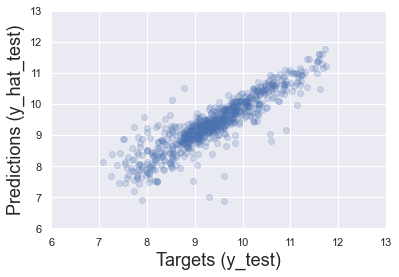

In [71]:
#plot the predictions of the model vs the targets
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()
# the model is better at predicting higher prices than predicting lower prices (more concentration of points
# at the higher end, vs more dispersion of points at the lower end)

### Compare test predictions vs targets in a dataframe

In [72]:
#show y_hat_test results
df_performance = pd.DataFrame(y_hat_test, columns=['Prediction'])
df_performance.head()

,Prediction
0,9.244614
1,325879.180318
2,8.397348
3,8.878061
4,9.337812


In [73]:
# Show the values of the prediction results in a dataframe. y_hat_test values are still log values
# convert log values to normal values using np.exp() 
df_performance = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
# round the scientific values for better visual
df_performance = df_performance.round(5)
df_performance.head()
# one of the values is "inf", probably related to the Model 11 above.

C:\Users\dungn\AppData\Local\Temp\ipykernel_23496\913624540.py:3: RuntimeWarning: overflow encountered in exp
  df_performance = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])


,Prediction
0,10348.67756
1,inf
2,4435.28810
3,7172.86912
4,11359.52139


In [74]:
#compare prediction results to targets for some insight 
df_performance['Target'] = np.exp(y_test)
df_performance.head()
#the "Target" column does not display the number appropriately

,Prediction,Target
0,10348.67756,NaN
1,inf,7900.0
2,4435.28810,NaN
3,7172.86912,NaN
4,11359.52139,NaN


In [75]:
#show y_test result
y_test.head()

1192    7.740664
3360    7.937375
2350    7.824046
3257    8.764053
892     9.121509
Name: log_price, dtype: float64

In [76]:
# the "Target" column have NaN results because
# y_test still contain the original index when we perform train test split on the data =>
#pandas try to match the indices => incorrect display  
# reset the index  
y_test = y_test.reset_index(drop=True)
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [77]:
#convert log_values of y_test & put in the daataframe for comparison
df_performance['Target'] = np.exp(y_test)
df_performance.head(30)

,Prediction,Target
0,10348.67756,2300.0
1,inf,2800.0
2,4435.28810,2500.0
3,7172.86912,6400.0
4,11359.52139,9150.0
5,inf,20000.0
6,8199.43965,38888.0
7,12331.54262,16999.0
8,12310.37038,12500.0
9,41893.13893,41000.0


### View the difference between test predictions vs targets 

In [78]:
# Difference = targets - predictions
df_performance['Difference'] = df_performance['Target'] - df_performance['Prediction']

In [79]:
# Difference %
df_performance['Difference%'] = np.absolute(df_performance['Difference']/df_performance['Target']*100)
df_performance.head(20)

,Prediction,Target,Difference,Difference%
0,10348.67756,2300.0,-8048.67756,349.942503
1,inf,2800.0,-inf,inf
2,4435.28810,2500.0,-1935.28810,77.411524
3,7172.86912,6400.0,-772.86912,12.076080
4,11359.52139,9150.0,-2209.52139,24.147775
5,inf,20000.0,-inf,inf
6,8199.43965,38888.0,30688.56035,78.915245
7,12331.54262,16999.0,4667.45738,27.457247
8,12310.37038,12500.0,189.62962,1.517037
9,41893.13893,41000.0,-893.13893,2.178388


In [82]:
# view the Descriptive statistics of the dataframe
df_performance.describe()
# some descriptive statistics cannot be calculated due to some "inf" values predictedby the model.

,Prediction,Target,Difference,Difference%
count,774.00,774.00,774.00,774.00
mean,inf,18165.82,-inf,inf
std,NaN,19967.86,NaN,NaN
min,0.00,1200.00,-inf,0.00
25%,7213.08,6900.00,-1942.43,8.38
50%,11222.93,11600.00,219.98,19.08
75%,19949.82,20500.00,2312.33,35.63
max,inf,126000.00,76318.85,inf


In [81]:
#display all the rows in the dataframe
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_performance.sort_values(by=['Difference%'])
# Some values are way off the mark, some values are infinite

,Prediction,Target,Difference,Difference%
359,3998.90,3999.00,0.10,0.00
137,107881.48,107999.00,117.52,0.11
97,2695.49,2700.00,4.51,0.17
622,4214.55,4200.00,-14.55,0.35
752,12041.87,12000.00,-41.87,0.35
493,5020.32,4999.00,-21.32,0.43
24,20990.29,20900.00,-90.29,0.43
497,51728.25,51500.00,-228.25,0.44
521,23392.64,23500.00,107.36,0.46
36,12358.37,12300.00,-58.37,0.47
